<a href="https://colab.research.google.com/github/KHKGuilherme/LongShortTermMemory/blob/main/IC_VersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline

## Objetivos
* Detectar ataques DDoS, através de Algoritmos de Machine Learning | Deep Learning. (Random Forest, ARIMA MAX, LSTM)



* Implementar Random Forest
  * Gini? e Altura Máxima da Árvore

* Implementar Arima MAX
  * Automático -> Deve descobrir como implementa-lo

* Implementar LSTM
  * Dense, Dropout e Segundos Levados em Consideração

* Para todos os casos, deve-se salvar os modelos gerados

# Bibliotecas

In [ ]:
# Tratamento e Manipulação dos dados
import numpy as np
import pandas as pd

# Molelos
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from keras.layers import LSTM, Input, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.layers import TimeDistributed
from sklearn.tree import export_graphviz
from keras.layers import RepeatVector
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.models import Model
from keras import metrics



# Gráficos
from matplotlib import pyplot as plt
import seaborn as sns


# Google Drive
import os
from google.colab import drive



In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/IC/4Step/Dataset')

Mounted at /content/drive


In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.4 MB/s eta 0:00:00


# LSTM's

## Processamento

### Processamento dos Dados + Treino 0.2 - 30 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,30)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16568, 30, 11)
(16568, 1)
30 1


In [ ]:
taxa_esquecimento = 0.2

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 29s 114ms/step - loss: 0.0792 - root_mean_squared_error: 0.2815
Epoch 2/50
166/166 [==============================] - 20s 122ms/step - loss: 0.0584 - root_mean_squared_error: 0.2417
Epoch 3/50
166/166 [==============================] - 18s 111ms/step - loss: 0.0556 - root_mean_squared_error: 0.2357
Epoch 4/50
166/166 [==============================] - 19s 113ms/step - loss: 0.0535 - root_mean_squared_error: 0.2313
Epoch 5/50
166/166 [==============================] - 20s 122ms/step - loss: 0.0523 - root_mean_squared_error: 0.2287
Epoch 6/50
166/166 [==============================] - 19s 114ms/step - loss: 0.0516 - root_mean_squared_error: 0.2272
Epoch 7/50
166/166 [==============================] - 19s 112ms/step - loss: 0.0511 - root_mean_squared_error: 0.2262
Epoch 8/50
166/166 [==============================] - 19s 116ms/step - loss: 0.0510 - root_mean_squared_error: 0.2258
Epoch 9/50
166/166 [==============================] - 20

In [ ]:
modelo.save('modelo_test02_30.h5')

### Processamento dos Dados + Treino 0.2 - 60 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,60)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16538, 60, 11)
(16538, 1)
60 1


In [ ]:
taxa_esquecimento = 0.2

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 45s 208ms/step - loss: 0.0794 - root_mean_squared_error: 0.2818
Epoch 2/50
166/166 [==============================] - 36s 219ms/step - loss: 0.0560 - root_mean_squared_error: 0.2366
Epoch 3/50
166/166 [==============================] - 35s 209ms/step - loss: 0.0549 - root_mean_squared_error: 0.2344
Epoch 4/50
166/166 [==============================] - 35s 210ms/step - loss: 0.0538 - root_mean_squared_error: 0.2320
Epoch 5/50
166/166 [==============================] - 37s 221ms/step - loss: 0.0519 - root_mean_squared_error: 0.2278
Epoch 6/50
166/166 [==============================] - 35s 211ms/step - loss: 0.0517 - root_mean_squared_error: 0.2274
Epoch 7/50
166/166 [==============================] - 36s 219ms/step - loss: 0.0516 - root_mean_squared_error: 0.2272
Epoch 8/50
166/166 [==============================] - 35s 210ms/step - loss: 0.0522 - root_mean_squared_error: 0.2284
Epoch 9/50
166/166 [==============================] - 35

In [ ]:
modelo.save('modelo_test02_60.h5')

### Processamento dos Dados + Treino 0.2 - 90 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,90)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16508, 90, 11)
(16508, 1)
90 1


In [ ]:
taxa_esquecimento = 0.2

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 60s 303ms/step - loss: 0.0729 - root_mean_squared_error: 0.2701
Epoch 2/50
166/166 [==============================] - 52s 315ms/step - loss: 0.0553 - root_mean_squared_error: 0.2352
Epoch 3/50
166/166 [==============================] - 51s 305ms/step - loss: 0.0543 - root_mean_squared_error: 0.2330
Epoch 4/50
166/166 [==============================] - 52s 312ms/step - loss: 0.0526 - root_mean_squared_error: 0.2294
Epoch 5/50
166/166 [==============================] - 51s 309ms/step - loss: 0.0518 - root_mean_squared_error: 0.2275
Epoch 6/50
166/166 [==============================] - 51s 310ms/step - loss: 0.0511 - root_mean_squared_error: 0.2261
Epoch 7/50
166/166 [==============================] - 52s 314ms/step - loss: 0.0510 - root_mean_squared_error: 0.2259
Epoch 8/50
166/166 [==============================] - 51s 308ms/step - loss: 0.0500 - root_mean_squared_error: 0.2236
Epoch 9/50
166/166 [==============================] - 52

In [ ]:
modelo.save('modelo_test02_90.h5')

### Processamento dos Dados + Treino 0.3 - 30 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,30)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16568, 30, 11)
(16568, 1)
30 1


In [ ]:
taxa_esquecimento = 0.3

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 28s 114ms/step - loss: 0.0895 - root_mean_squared_error: 0.2992
Epoch 2/50
166/166 [==============================] - 20s 123ms/step - loss: 0.0578 - root_mean_squared_error: 0.2405
Epoch 3/50
166/166 [==============================] - 19s 113ms/step - loss: 0.0560 - root_mean_squared_error: 0.2367
Epoch 4/50
166/166 [==============================] - 19s 113ms/step - loss: 0.0536 - root_mean_squared_error: 0.2315
Epoch 5/50
166/166 [==============================] - 20s 123ms/step - loss: 0.0522 - root_mean_squared_error: 0.2284
Epoch 6/50
166/166 [==============================] - 19s 112ms/step - loss: 0.0518 - root_mean_squared_error: 0.2276
Epoch 7/50
166/166 [==============================] - 19s 113ms/step - loss: 0.0514 - root_mean_squared_error: 0.2268
Epoch 8/50
166/166 [==============================] - 20s 121ms/step - loss: 0.0516 - root_mean_squared_error: 0.2273
Epoch 9/50
166/166 [==============================] - 22

In [ ]:
modelo.save('modelo_test03_30.h5')

### Processamento dos Dados + Treino 0.3 - 60 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,60)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16538, 60, 11)
(16538, 1)
60 1


In [ ]:
taxa_esquecimento = 0.3

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 46s 214ms/step - loss: 0.0739 - root_mean_squared_error: 0.2719
Epoch 2/50
166/166 [==============================] - 35s 211ms/step - loss: 0.0558 - root_mean_squared_error: 0.2362
Epoch 3/50
166/166 [==============================] - 37s 222ms/step - loss: 0.0552 - root_mean_squared_error: 0.2349
Epoch 4/50
166/166 [==============================] - 35s 210ms/step - loss: 0.0532 - root_mean_squared_error: 0.2308
Epoch 5/50
166/166 [==============================] - 36s 220ms/step - loss: 0.0527 - root_mean_squared_error: 0.2295
Epoch 6/50
166/166 [==============================] - 37s 223ms/step - loss: 0.0524 - root_mean_squared_error: 0.2289
Epoch 7/50
166/166 [==============================] - 35s 211ms/step - loss: 0.0521 - root_mean_squared_error: 0.2282
Epoch 8/50
166/166 [==============================] - 37s 221ms/step - loss: 0.0516 - root_mean_squared_error: 0.2272
Epoch 9/50
166/166 [==============================] - 35

In [ ]:
modelo.save('modelo_test03_60.h5')

### Processamento dos Dados + Treino 0.3 - 90 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,90)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16508, 90, 11)
(16508, 1)
90 1


In [ ]:
taxa_esquecimento = 0.3

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 62s 312ms/step - loss: 0.1028 - root_mean_squared_error: 0.3207
Epoch 2/50
166/166 [==============================] - 53s 318ms/step - loss: 0.0564 - root_mean_squared_error: 0.2376
Epoch 3/50
166/166 [==============================] - 53s 316ms/step - loss: 0.0542 - root_mean_squared_error: 0.2329
Epoch 4/50
166/166 [==============================] - 54s 324ms/step - loss: 0.0550 - root_mean_squared_error: 0.2345
Epoch 5/50
166/166 [==============================] - 51s 309ms/step - loss: 0.0518 - root_mean_squared_error: 0.2276
Epoch 6/50
166/166 [==============================] - 53s 320ms/step - loss: 0.0510 - root_mean_squared_error: 0.2258
Epoch 7/50
166/166 [==============================] - 51s 308ms/step - loss: 0.0519 - root_mean_squared_error: 0.2279
Epoch 8/50
166/166 [==============================] - 55s 334ms/step - loss: 0.0504 - root_mean_squared_error: 0.2244
Epoch 9/50
166/166 [==============================] - 52

In [ ]:
modelo.save('modelo_test03_90.h5')

### Processamento dos Dados + Treino 0.4 - 30 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,30)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16568, 30, 11)
(16568, 1)
30 1


In [ ]:
taxa_esquecimento = 0.4

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 31s 127ms/step - loss: 0.0777 - root_mean_squared_error: 0.2787
Epoch 2/50
166/166 [==============================] - 19s 115ms/step - loss: 0.0576 - root_mean_squared_error: 0.2399
Epoch 3/50
166/166 [==============================] - 19s 116ms/step - loss: 0.0552 - root_mean_squared_error: 0.2349
Epoch 4/50
166/166 [==============================] - 21s 128ms/step - loss: 0.0546 - root_mean_squared_error: 0.2338
Epoch 5/50
166/166 [==============================] - 21s 126ms/step - loss: 0.0528 - root_mean_squared_error: 0.2299
Epoch 6/50
166/166 [==============================] - 20s 118ms/step - loss: 0.0525 - root_mean_squared_error: 0.2292
Epoch 7/50
166/166 [==============================] - 21s 125ms/step - loss: 0.0515 - root_mean_squared_error: 0.2270
Epoch 8/50
166/166 [==============================] - 20s 120ms/step - loss: 0.0515 - root_mean_squared_error: 0.2269
Epoch 9/50
166/166 [==============================] - 20

In [ ]:
modelo.save('modelo_test04_30.h5')

### Processamento dos Dados + Treino 0.4 - 60 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,60)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16538, 60, 11)
(16538, 1)
60 1


In [ ]:
taxa_esquecimento = 0.4

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 60s 218ms/step - loss: 0.1534 - root_mean_squared_error: 0.3917
Epoch 2/50
166/166 [==============================] - 39s 234ms/step - loss: 0.0691 - root_mean_squared_error: 0.2630
Epoch 3/50
166/166 [==============================] - 36s 217ms/step - loss: 0.0556 - root_mean_squared_error: 0.2358
Epoch 4/50
166/166 [==============================] - 38s 229ms/step - loss: 0.0536 - root_mean_squared_error: 0.2314
Epoch 5/50
166/166 [==============================] - 39s 234ms/step - loss: 0.0533 - root_mean_squared_error: 0.2308
Epoch 6/50
166/166 [==============================] - 38s 228ms/step - loss: 0.0531 - root_mean_squared_error: 0.2304
Epoch 7/50
166/166 [==============================] - 36s 220ms/step - loss: 0.0520 - root_mean_squared_error: 0.2280
Epoch 8/50
166/166 [==============================] - 38s 228ms/step - loss: 0.0510 - root_mean_squared_error: 0.2258
Epoch 9/50
166/166 [==============================] - 36

In [ ]:
modelo.save('modelo_test04_60.h5')

### Processamento dos Dados + Treino 0.4 - 90 segundos

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_train = pd.DataFrame(pd.read_csv("treinamento_cicddos2019.csv"), columns = [' Label'])
df_x_train.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.6,1.0,0.75,1.0,0.0


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_train,df_y_train,90)


In [ ]:
print(X.shape)
print(y.shape)
print(X.shape[1],1)

(16508, 90, 11)
(16508, 1)
90 1


In [ ]:
taxa_esquecimento = 0.4

In [ ]:
# Declarando Modelo
modelo = Sequential()

# Camada de Entrada
# Units => Memoriza 5 valores passados para passar ao futuro
# Return_sequences => Deve gerar algo
# Input Shape => Formato da entrada
modelo.add(LSTM(units = 60, return_sequences = True, input_shape = (X.shape[1],11)))
# Regularizar o conteudo que está sendo passado => "Esquece 30% do Conteudo"
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(50))

# Camada Oculta
modelo.add(LSTM(units= 50,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(30))

# Camada Oculta
modelo.add(LSTM(units= 30,return_sequences=True))
modelo.add(Dropout(taxa_esquecimento))
modelo.add(Dense(10))

modelo.add(LSTM(units= 10,return_sequences=False))
modelo.add(Dense(1))

# Camada de Saída
modelo.add(Dense(units=1,activation = 'hard_sigmoid'))

In [ ]:
modelo.compile(optimizer='adam',loss='mean_squared_error', metrics = [metrics.RootMeanSquaredError(name="root_mean_squared_error")])

In [ ]:
modelo.fit(X, y,epochs=50,batch_size=100)

Epoch 1/50
166/166 [==============================] - 66s 341ms/step - loss: 0.1078 - root_mean_squared_error: 0.3283
Epoch 2/50
166/166 [==============================] - 54s 328ms/step - loss: 0.0560 - root_mean_squared_error: 0.2366
Epoch 3/50
166/166 [==============================] - 52s 315ms/step - loss: 0.0552 - root_mean_squared_error: 0.2350
Epoch 4/50
166/166 [==============================] - 56s 340ms/step - loss: 0.0538 - root_mean_squared_error: 0.2319
Epoch 5/50
166/166 [==============================] - 55s 330ms/step - loss: 0.0537 - root_mean_squared_error: 0.2317
Epoch 6/50
166/166 [==============================] - 53s 320ms/step - loss: 0.0526 - root_mean_squared_error: 0.2294
Epoch 7/50
166/166 [==============================] - 54s 328ms/step - loss: 0.0523 - root_mean_squared_error: 0.2287
Epoch 8/50
166/166 [==============================] - 56s 339ms/step - loss: 0.0524 - root_mean_squared_error: 0.2288
Epoch 9/50
166/166 [==============================] - 53

In [ ]:
modelo.save('modelo_test04_90.h5')

## Teste

### Teste 02 30

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,30)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test02_30.h5')

In [ ]:
y_test = model.predict(X)

224/224 [==============================] - 12s 34ms/step


<ipython-input-12-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


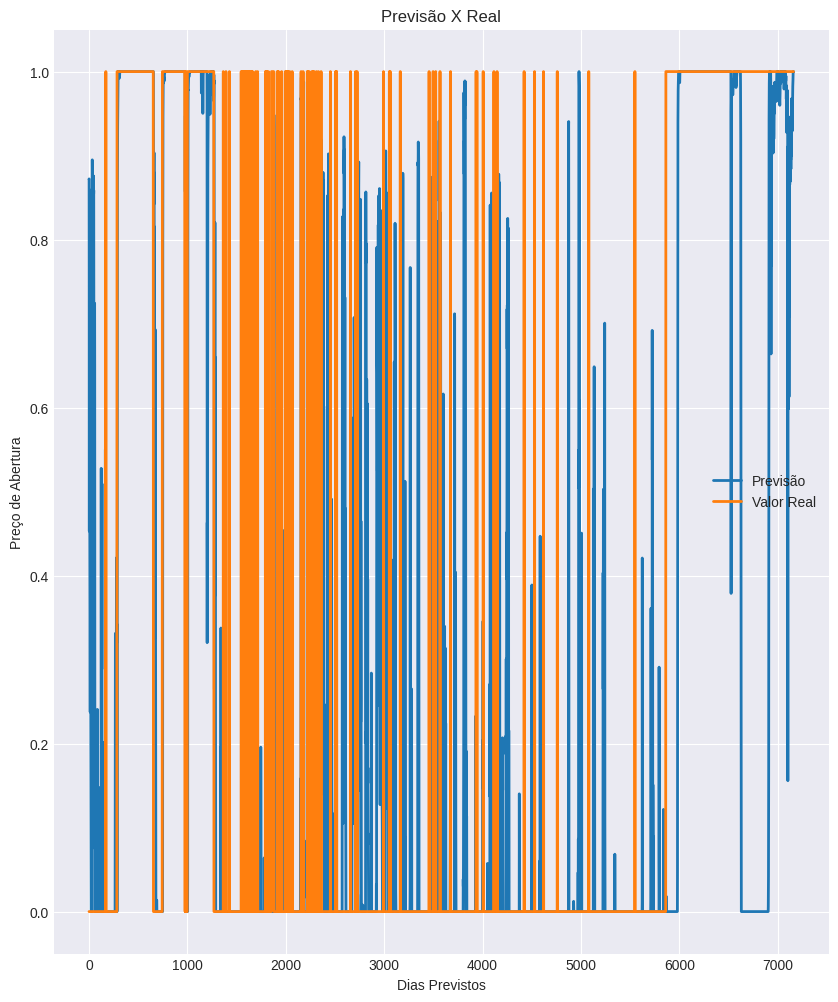

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

2368

In [ ]:
cont_0

4795

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4881

Text(1.3, 1.5, 'TN')

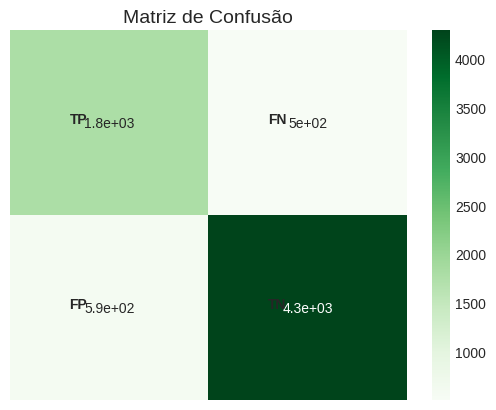

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_2_30 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.8475499092558983
Precisão: 0.7512668918918919
Recall: 0.7795793163891324
F1-Measure: 0.7651612903225805


### Teste 02 60

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,60)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test02_60.h5')

In [ ]:
y_test = model.predict(X)

223/223 [==============================] - 20s 72ms/step


<ipython-input-26-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


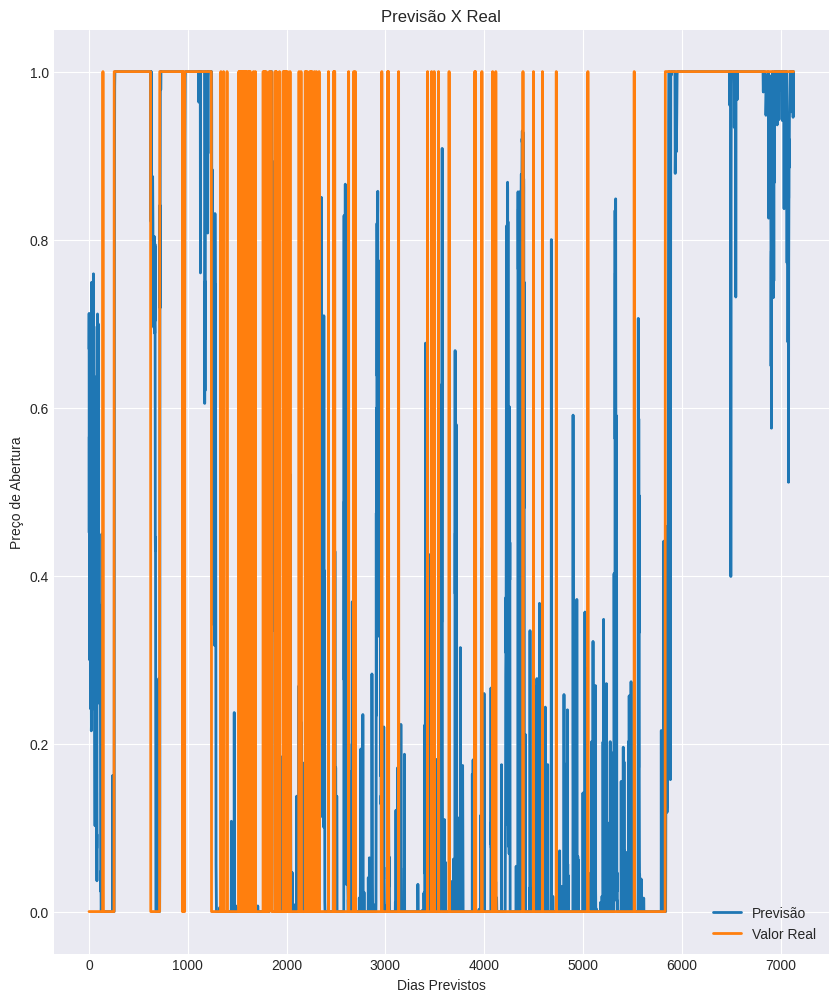

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

2698

In [ ]:
cont_0

4435

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4851

Text(1.3, 1.5, 'TN')

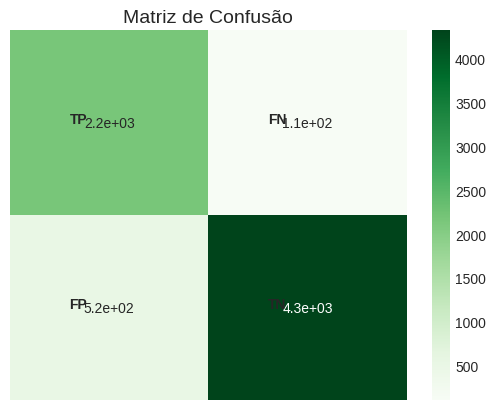

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_2_60 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.9113977288658348
Precisão: 0.8057820607857672
Recall: 0.9526730937773883
F1-Measure: 0.8730923694779116


### Teste 02 90

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,90)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test02_90.h5')

In [ ]:
y_test = model.predict(X)

222/222 [==============================] - 15s 58ms/step


<ipython-input-40-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


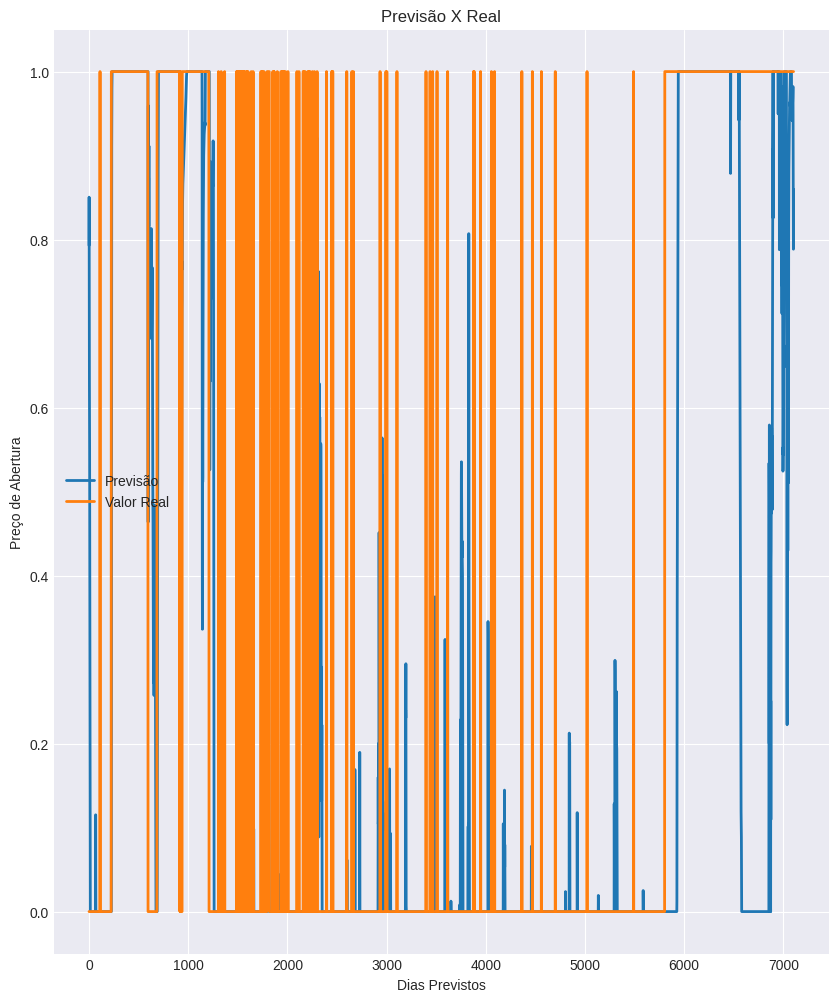

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

2026

In [ ]:
cont_0

5077

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4821

Text(1.3, 1.5, 'TN')

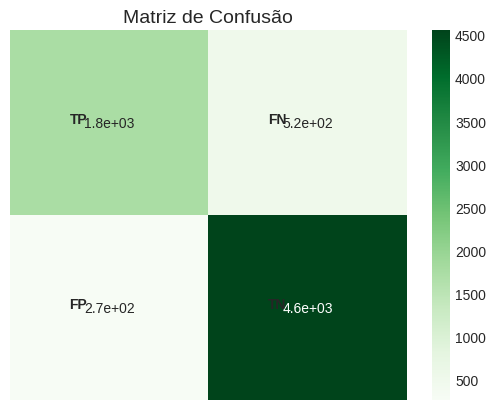

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_2_90 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.8882162466563424
Precisão: 0.8672260612043435
Recall: 0.7699386503067485
F1-Measure: 0.8156917363045496


### Teste 03 30

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,30)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test03_30.h5')

In [ ]:
y_test = model.predict(X)

224/224 [==============================] - 6s 20ms/step


<ipython-input-54-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


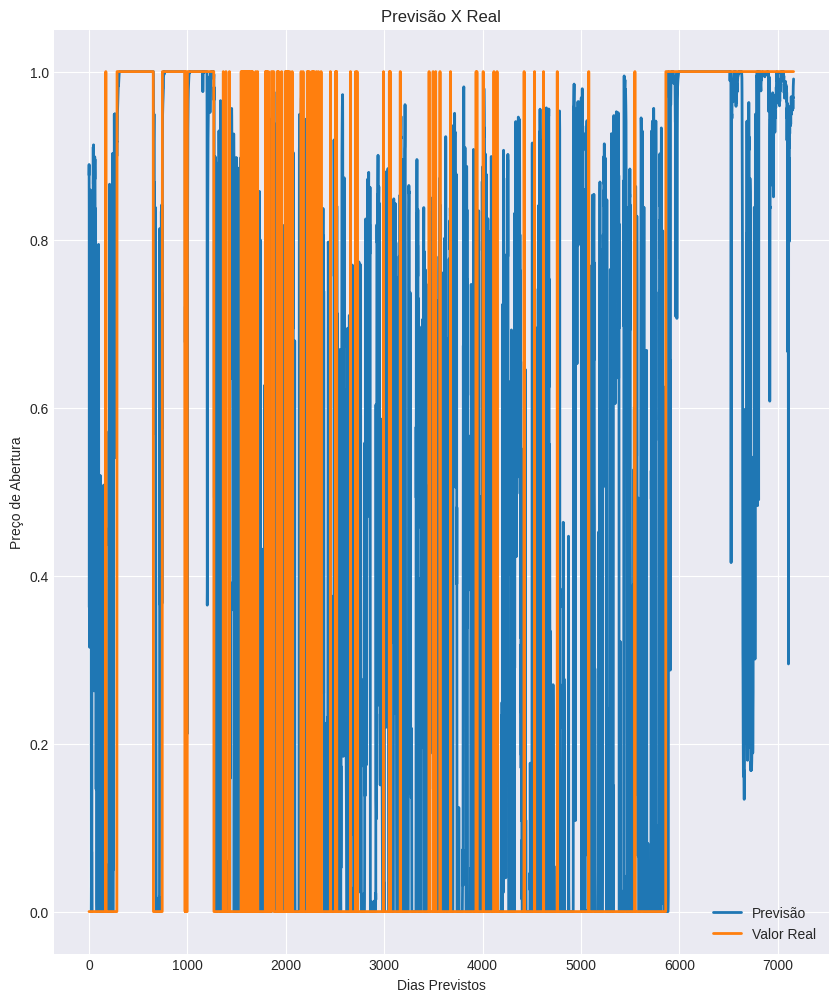

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

4388

In [ ]:
cont_0

2775

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4881

Text(1.3, 1.5, 'TN')

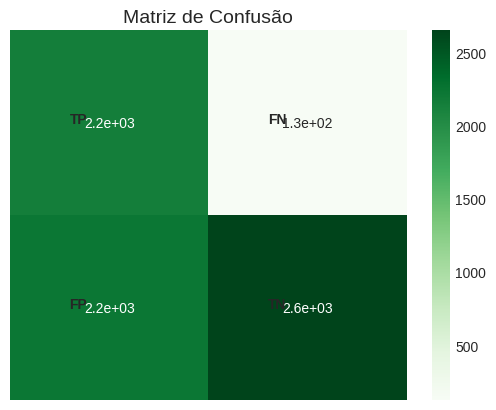

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_3_30 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.6705291079156778
Precisão: 0.49111212397447584
Recall: 0.9443470639789658
F1-Measure: 0.6461769115442278


### Teste 03 60

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,60)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test03_60.h5')

In [ ]:
y_test = model.predict(X)

223/223 [==============================] - 11s 36ms/step


<ipython-input-68-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


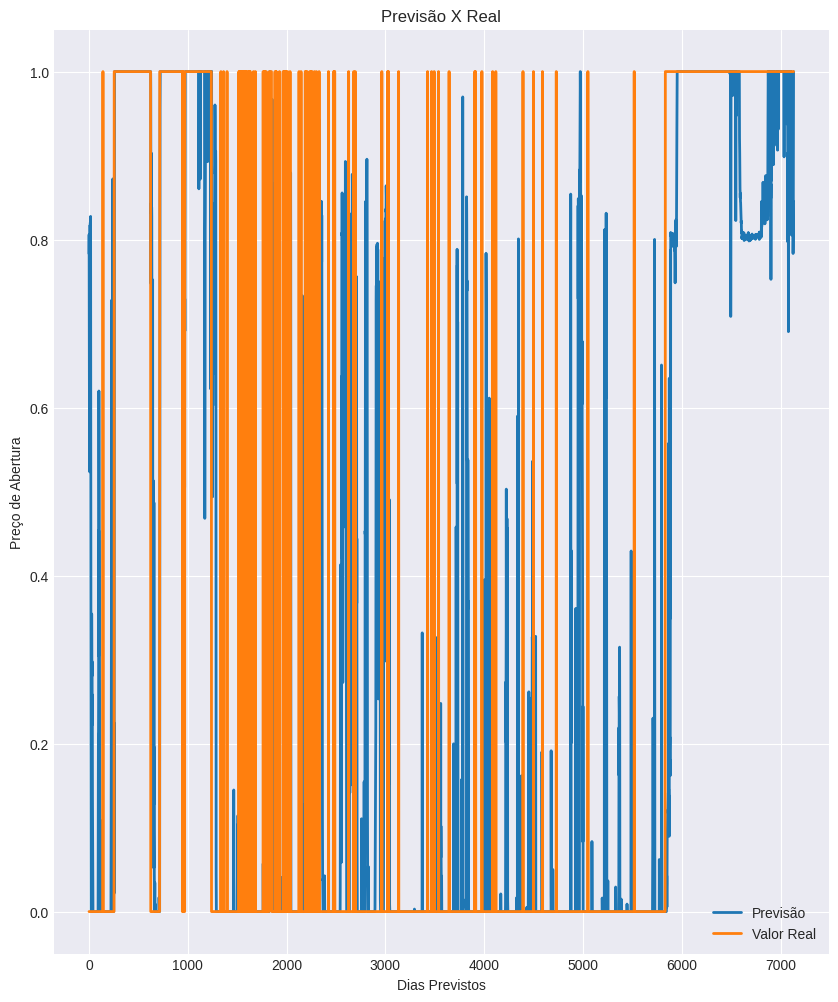

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

2787

In [ ]:
cont_0

4346

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4851

Text(1.3, 1.5, 'TN')

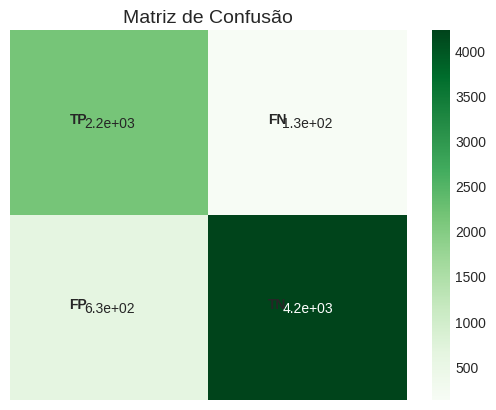

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_3_60 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.8938735454927801
Precisão: 0.7735916756368856
Recall: 0.9447852760736196
F1-Measure: 0.8506608798579602


### Teste 03 90

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,90)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test03_90.h5')

In [ ]:
y_test = model.predict(X)

222/222 [==============================] - 13s 53ms/step


<ipython-input-82-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


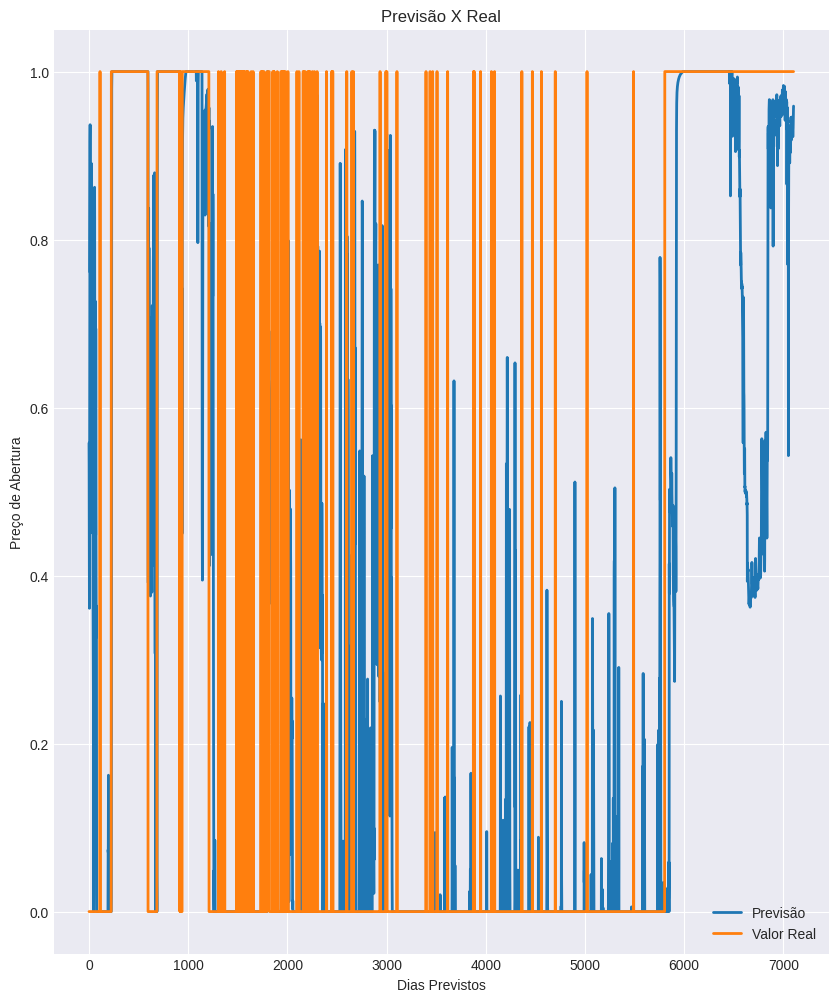

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

2769

In [ ]:
cont_0

4334

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4821

Text(1.3, 1.5, 'TN')

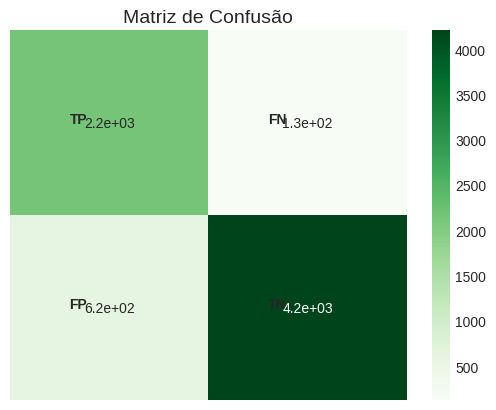

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_3_90 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.8953963114177108
Precisão: 0.7778981581798483
Recall: 0.9439088518843121
F1-Measure: 0.8529004157592557


### Teste 04 30

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,30)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test04_30.h5')

In [ ]:
y_test = model.predict(X)

224/224 [==============================] - 7s 24ms/step


<ipython-input-96-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


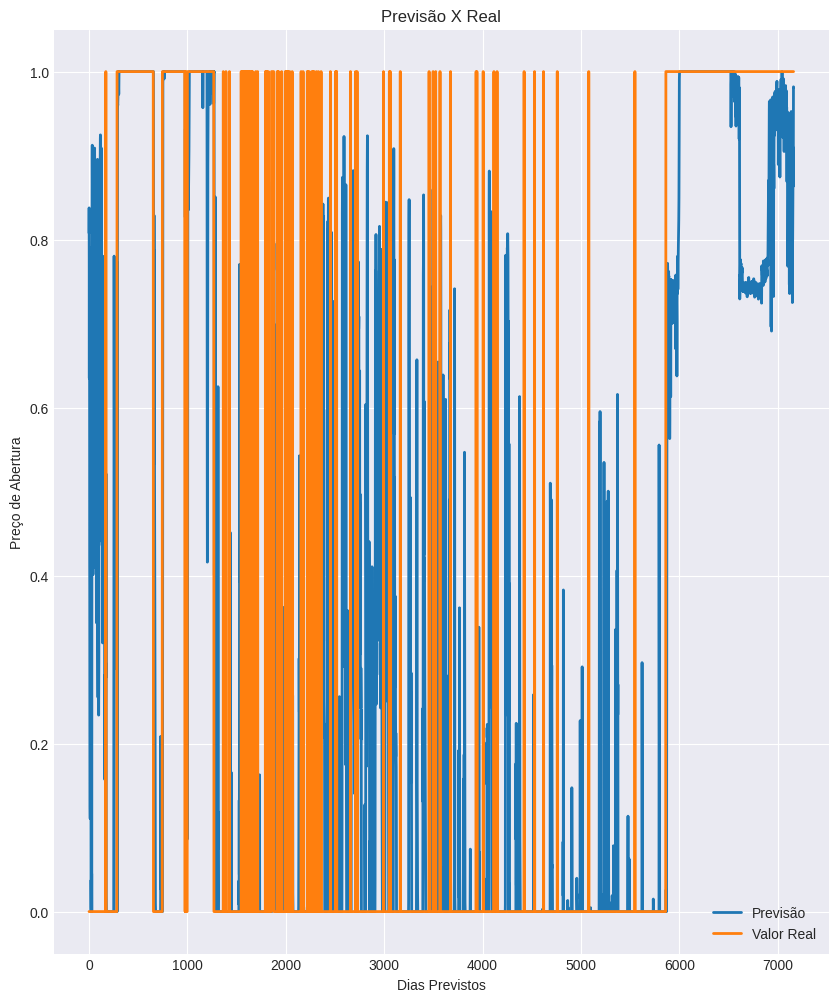

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

3078

In [ ]:
cont_0

4085

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4881

Text(1.3, 1.5, 'TN')

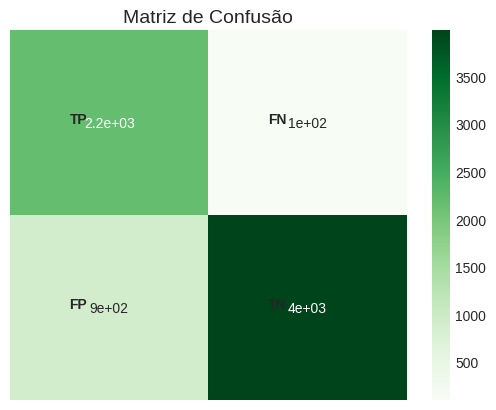

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_4_30 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.8606729024151891
Precisão: 0.7085769980506823
Recall: 0.955740578439965
F1-Measure: 0.8138059701492537


### Teste 04 60

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,60)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test04_60.h5')

In [ ]:
y_test = model.predict(X)

223/223 [==============================] - 11s 43ms/step


<ipython-input-110-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


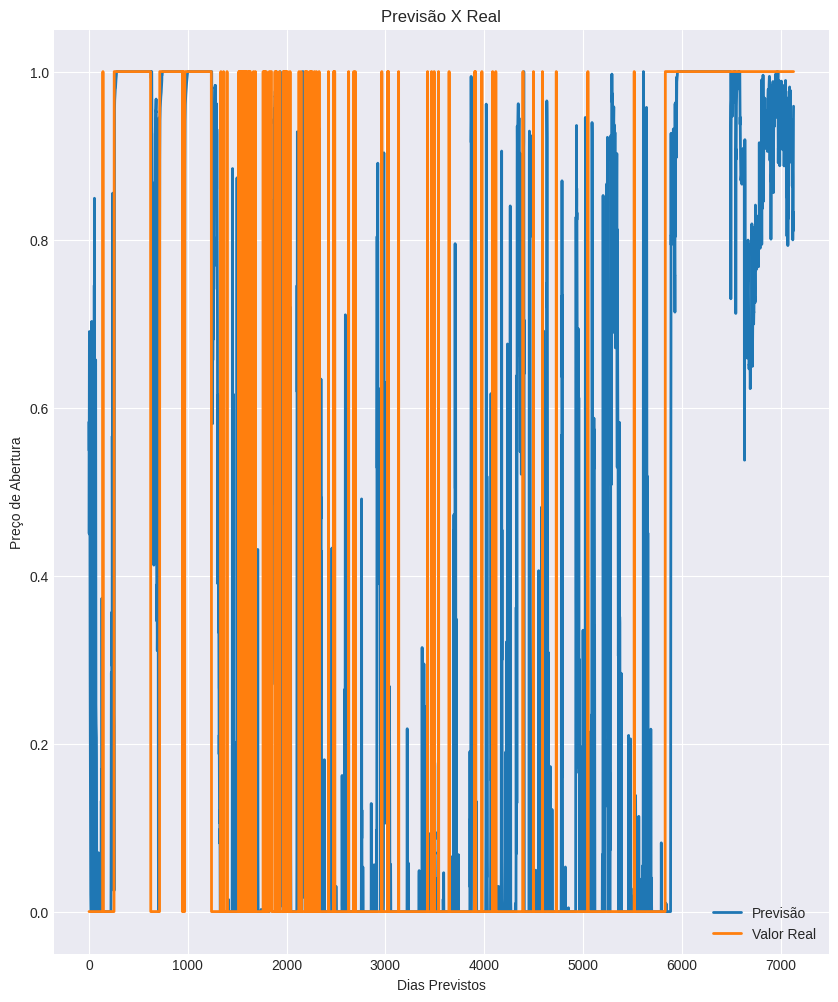

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

3130

In [ ]:
cont_0

4003

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4851

Text(1.3, 1.5, 'TN')

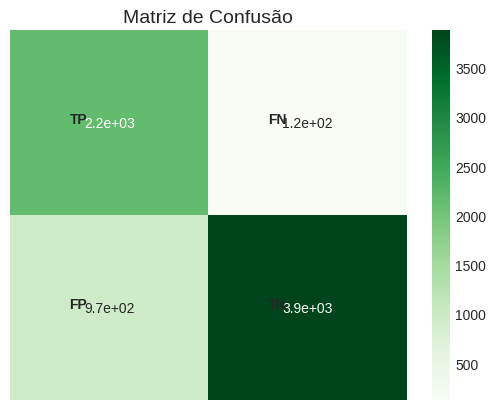

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_4_60 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.8460675732510865
Precisão: 0.6891373801916932
Recall: 0.9452234881682734
F1-Measure: 0.7971175166297116


### Teste 04 90

In [ ]:
# ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound']
df_x_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = ['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
df_y_test = pd.DataFrame(pd.read_csv("teste_cicddos2019.csv"), columns = [' Label'])
df_x_test.head()



,Flow ID,Destination Port,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Min Packet Length,Packet Length Mean,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Inbound
0,3.756993,3.798505,204.347826,203.478261,203.913043,203.478261,204.099379,0.108696,305.898551,203.913043,0.934783
1,4.919981,4.839029,191.007299,189.839416,190.489098,189.839416,190.574423,0.160584,285.456596,190.489098,0.934307
2,4.718499,4.473980,210.232143,201.294643,203.063754,201.187500,203.485505,0.125000,304.030576,203.063754,0.875000
3,4.543295,4.508233,250.595745,218.936170,224.037845,218.872340,221.550502,0.042553,331.026750,224.037845,0.957447
4,4.584967,4.359523,249.755102,194.285714,203.149309,193.979592,200.819700,0.112245,297.714331,203.149309,0.846939


In [ ]:
from ast import Yield
def create_lstm_dataset(matrix,matrix_y,n_steps):
    X, y = [], []
    for i in range(n_steps,len(matrix)):
        X.append(matrix.iloc[i-n_steps:i].values)
        y.append(matrix_y.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X,y

X,y = create_lstm_dataset(df_x_test,df_y_test,90)


In [ ]:
# Carregar o modelo do arquivo
model = load_model('modelo_test04_90.h5')

In [ ]:
y_test = model.predict(X)

222/222 [==============================] - 14s 55ms/step


<ipython-input-124-6bb8705857a2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


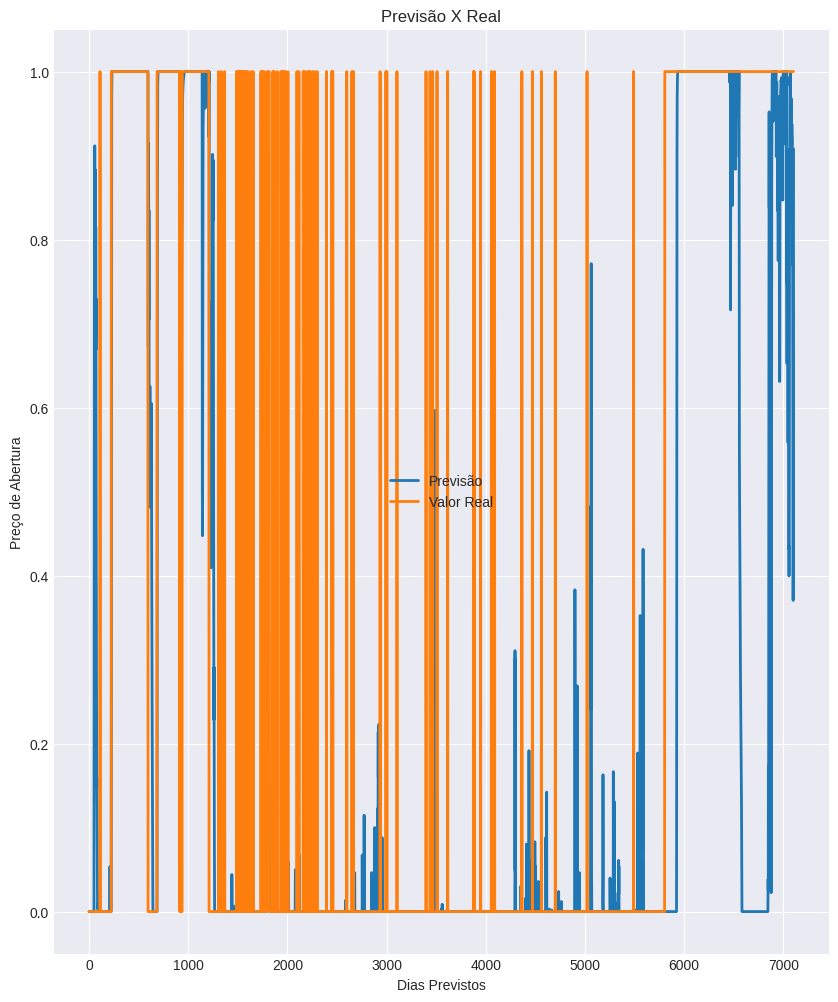

In [ ]:

# Configurações de estilo
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 12))  # Tamanho da figura
# plt.plot(x, y1, label='Variável 1', color='blue', linewidth=2)  # Linha da variável 1
# plt.plot(x, y2, label='Variável 2', color='green', linewidth=2)  # Linha da variável 2

# Criar o gráfico de linha
plt.plot(y_test,linewidth=2, label='Previsão')
plt.plot(y,linewidth=2, label='Valor Real')

# Configurações do gráfico
plt.xlabel('Dias Previstos')
plt.ylabel('Preço de Abertura')
plt.title('Previsão X Real')

# Legenda
plt.legend()

# Grade de fundo
plt.grid(True)

# Exibir o gráfico
plt.show()



In [ ]:
cont_1, cont_0 = 0,0
for i in range(0,len(y_test)):
  if y_test[i]>=0.3:
    y_test[i]=1
    cont_1+=1
  else:
    y_test[i]=0
    cont_0+=1

In [ ]:
cont_1

1934

In [ ]:
cont_0

5169

In [ ]:
cont_11, cont_01 = 0,0
for i in range(0,len(y_test)):
  if y[i]>0.3:
    cont_11 +=1
  else:
    cont_01 +=1

In [ ]:
cont_11

2282

In [ ]:
cont_01

4821

Text(1.3, 1.5, 'TN')

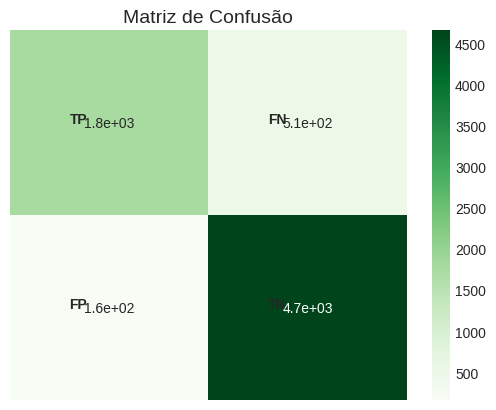

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y,y_test).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
test_4_90 = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(y, y_test)

# Calcular a Precisão
precision = precision_score(y, y_test)

# Calcular o Recall
recall = recall_score(y, y_test)

# Calcular o F1-Measure
f1 = f1_score(y, y_test)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.9053920878502041
Precisão: 0.9162357807652534
Recall: 0.7765118317265557
F1-Measure: 0.840607210626186


## Gráficos

<ipython-input-159-f4882bb2feb5>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  valores = np.array([test_2_30,test_2_60,test_2_90,test_3_30,test_3_60,test_3_90,test_4_30,test_4_60,test_4_90,forest_all,forest_11, Y_test])


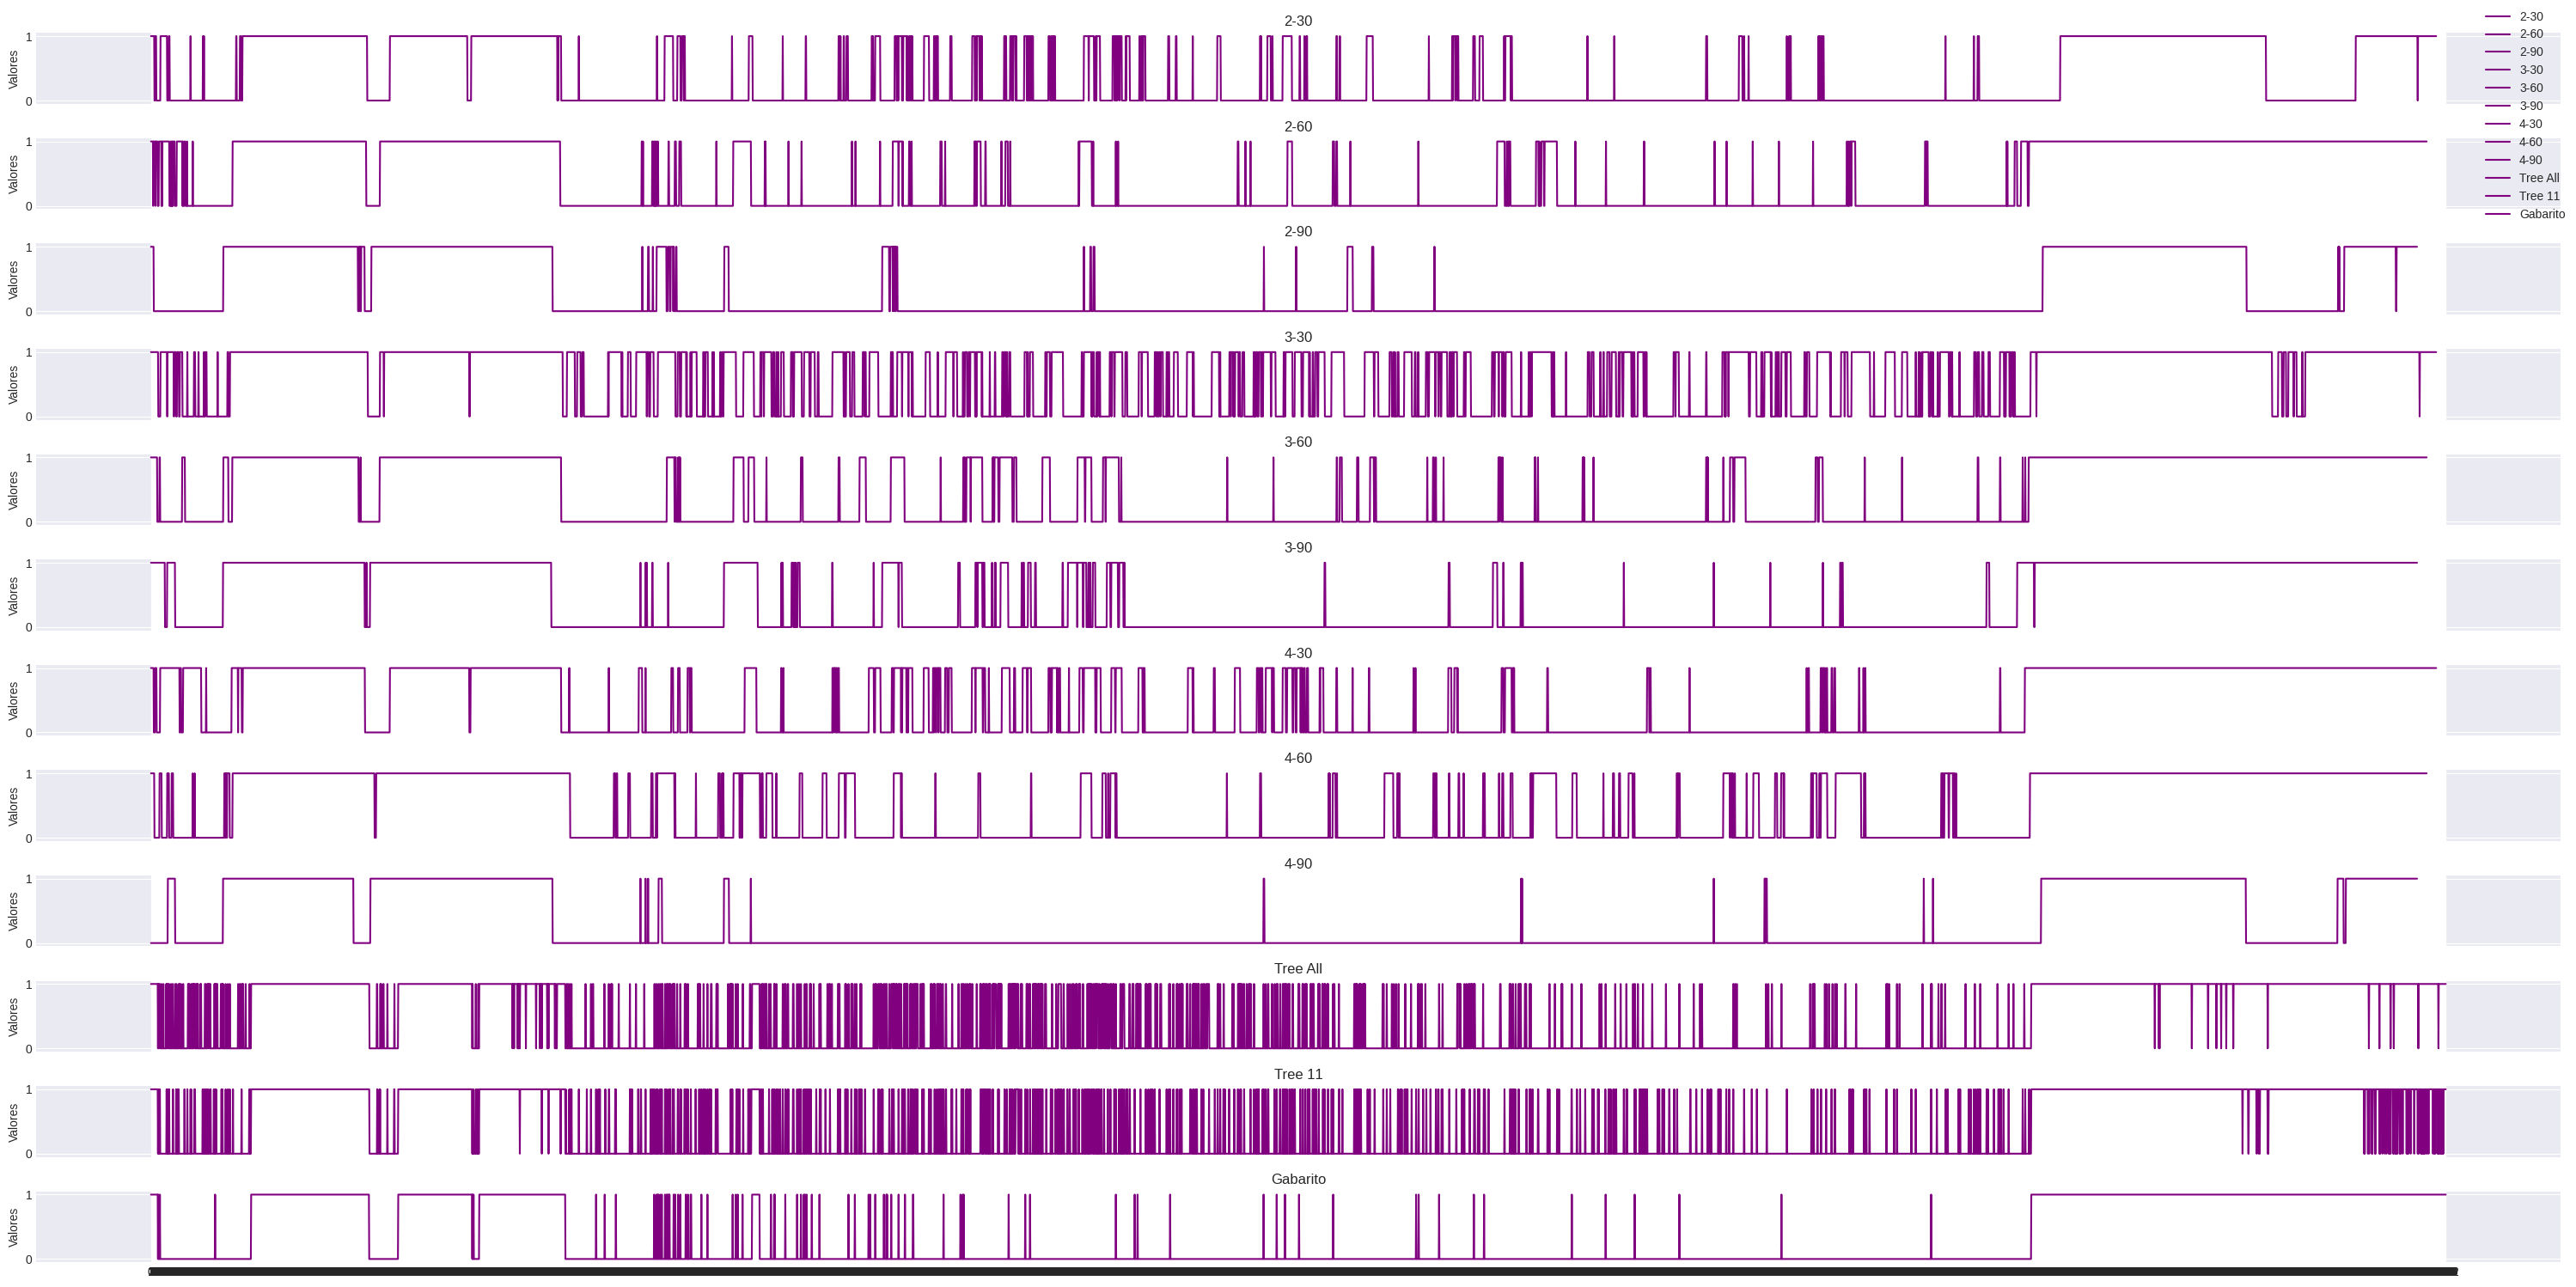

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
etiquetas = ['2-30','2-60','2-90', '3-30', '3-60','3-90', '4-30', '4-60','4-90','Tree All','Tree 11','Gabarito']  # Etiquetas para cada conjunto de valores
#etiquetas = ['2-60','2-90','3-30']  # Etiquetas para cada conjunto de valores

# Criar array com os vetores
valores = np.array([test_2_30,test_2_60,test_2_90,test_3_30,test_3_60,test_3_90,test_4_30,test_4_60,test_4_90,forest_all,forest_11, Y_test])

#valores = np.array([test_2_60,test_2_90,test_3_30])
# Criar subplots
fig, axs = plt.subplots(len(etiquetas), 1, figsize=(30, 15), sharex=True)

# Loop através das etiquetas
for i, ax in enumerate(axs):
    ax.plot(valores[i], color='purple',label=etiquetas[i])
    ax.set_ylabel('Valores')
    ax.set_title(etiquetas[i])
    ax.set_xticks(np.arange(len(valores[i])))
    ax.set_xticklabels([str(j) for j in range(len(valores[i]))])

# Adicionar legenda
fig.legend(loc='upper right')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Random Forest

## Versão 1 - 14

In [ ]:
#------------------------------#
# Importando os Datasets
#------------------------------#
train = pd.read_csv("treinamento_cicddos2019.csv")
X = pd.DataFrame(train,columns = ['Flow ID',' Source IP', ' Source Port', ' Destination IP',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
Y = pd.DataFrame(train, columns = [' Label'])

In [ ]:
clf_gini = DecisionTreeClassifier(max_depth=25)
history = clf_gini.fit(X,Y)

In [ ]:
#------------------------------#
# Importando os Datasets
#------------------------------#
test = pd.read_csv("teste_cicddos2019.csv")

X_test = pd.DataFrame(test,columns = ['Flow ID',' Source IP', ' Source Port', ' Destination IP',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'])
Y_test = pd.DataFrame(test, columns = [' Label'])

In [ ]:
tree_result = clf_gini.predict(X_test)
precisao = accuracy_score(Y_test, tree_result)

In [ ]:
precisao

0.9108855832058946

Text(1.3, 1.5, 'TN')

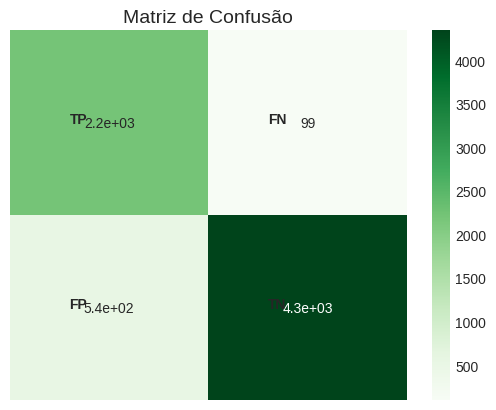

In [ ]:
# Básico
# confusion_matrix(Y_test,tree_result)

# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(Y_test,tree_result).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
# Relatório Alternativo
print(classification_report(Y_test,tree_result))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4887
           1       0.80      0.96      0.87      2306

    accuracy                           0.91      7193
   macro avg       0.89      0.92      0.90      7193
weighted avg       0.92      0.91      0.91      7193



In [ ]:
forest_feactures = clf_gini.feature_importances_
forest_feactures

array([0.01103849, 0.01612735, 0.0138739 , 0.02017785, 0.00858764,
       0.02502944, 0.03140049, 0.0027885 , 0.01537445, 0.02130913,
       0.21139808, 0.01399932, 0.00592242, 0.60297293])

In [ ]:
forest_11 = tree_result

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(Y_test,tree_result)

# Calcular a Precisão
precision = precision_score(Y_test,tree_result)
# Calcular o Recall
recall = recall_score(Y_test,tree_result)

# Calcular o F1-Measure
f1 = f1_score(Y_test,tree_result)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.9108855832058946
Precisão: 0.8028373954165151
Recall: 0.9570685169124025
F1-Measure: 0.873194856577646


## Versão 2 - ALL

In [ ]:
# Lê o arquivo CSV
train = pd.read_csv("treinamento_cicddos2019.csv")

# Obtém os nomes das colunas
nomes_colunas = train.columns.tolist()

# Forma a string com os nomes das colunas dentro de aspas e separados por vírgulas
string_colunas = ', '.join(f"'{coluna}'" for coluna in nomes_colunas)

In [ ]:
print(string_colunas)

'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', '

In [ ]:
#------------------------------#
# Importando os Datasets
#------------------------------#
train = pd.read_csv("treinamento_cicddos2019.csv")

X = pd.DataFrame(train, columns = ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min', 'SimillarHTTP', ' Inbound'])
Y = pd.DataFrame(train, columns = [' Label'])

In [ ]:
clf_gini = DecisionTreeClassifier(max_depth=60)
history = clf_gini.fit(X,Y)

In [ ]:
# export_graphviz(clf_gini,out_file='credit_tree.dot',feature_names=['Flow ID',' Destination Port',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Min Packet Length',' Packet Length Mean',' URG Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Inbound'],rounded=True,filled=True)

In [ ]:
#------------------------------#
# Importando os Datasets
#------------------------------#
test = pd.read_csv("teste_cicddos2019.csv")

X_test = pd.DataFrame(test, columns = ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min', 'SimillarHTTP', ' Inbound'])
Y_test = pd.DataFrame(test, columns = [' Label'])

In [ ]:
tree_result = clf_gini.predict(X_test)
precisao = accuracy_score(Y_test, tree_result)

In [ ]:
precisao

0.9015709717781176

Text(1.3, 1.5, 'TN')

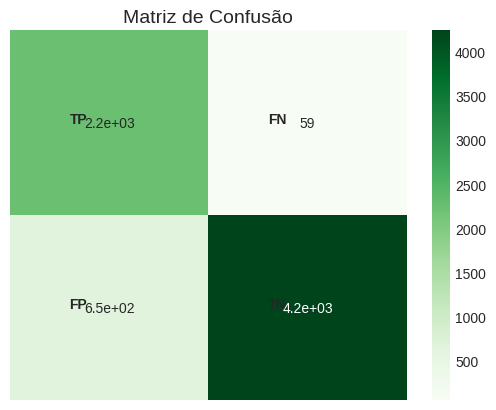

In [ ]:
# Básico
# confusion_matrix(Y_test,tree_result)

# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(Y_test,tree_result).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
# Relatório Alternativo
print(classification_report(Y_test,tree_result))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      4887
           1       0.78      0.97      0.86      2306

    accuracy                           0.90      7193
   macro avg       0.88      0.92      0.89      7193
weighted avg       0.92      0.90      0.90      7193



In [ ]:
forest_feactures = clf_gini.feature_importances_
forest_feactures

array([1.15321308e-03, 7.37875218e-03, 1.90425189e-04, 1.71630625e-03,
       5.17195771e-04, 5.31805537e-04, 2.17125438e-03, 2.76507439e-03,
       7.74230150e-04, 0.00000000e+00, 5.38857246e-04, 2.53957257e-04,
       0.00000000e+00, 7.04795015e-04, 2.78191467e-03, 1.08253392e-03,
       1.31533636e-03, 1.81543552e-03, 8.39469821e-04, 1.74435287e-04,
       2.72692849e-02, 1.44925159e-03, 5.75481060e-03, 1.20129259e-03,
       0.00000000e+00, 1.59094323e-02, 0.00000000e+00, 6.08541287e-04,
       6.94906313e-04, 1.17307731e-03, 2.13612886e-03, 5.44287465e-04,
       0.00000000e+00, 9.58598685e-04, 0.00000000e+00, 4.36813036e-03,
       1.96239698e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.31278873e-03, 4.50624493e-04, 5.11216724e-04, 6.29029996e-03,
       1.04789846e-02, 3.80732151e-03, 0.00000000e+00, 4.07015671e-04,
       2.09322345e-04, 0.00000000e+00, 1.89023505e-03, 8.31293167e-05,
       0.00000000e+00, 4.78449566e-03, 1.75797894e-01, 2.79721384e-02,
      

In [ ]:
forest_all = tree_result

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponha que y_true seja sua lista de rótulos verdadeiros e y_pred seja suas previsões.

# Calcular a Acurácia
accuracy = accuracy_score(Y_test,tree_result)

# Calcular a Precisão
precision = precision_score(Y_test,tree_result)

# Calcular o Recall
recall = recall_score(Y_test,tree_result)

# Calcular o F1-Measure
f1 = f1_score(Y_test,tree_result)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Measure:", f1)


Acurácia: 0.9015709717781176
Precisão: 0.7758977900552486
Recall: 0.9744145706851691
F1-Measure: 0.8638985005767014


## Q?